In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [23]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [24]:
df = {'x1':x[:,0],'x2':x[:,1],'y':y}
dataset = pd.DataFrame(df)
dataset.head()

,x1,x2,y
0,1.960690,0.045189,1
1,0.596525,-0.696728,1
2,0.858980,0.547049,0
3,-0.428174,0.414345,0
4,0.331401,-0.110277,1


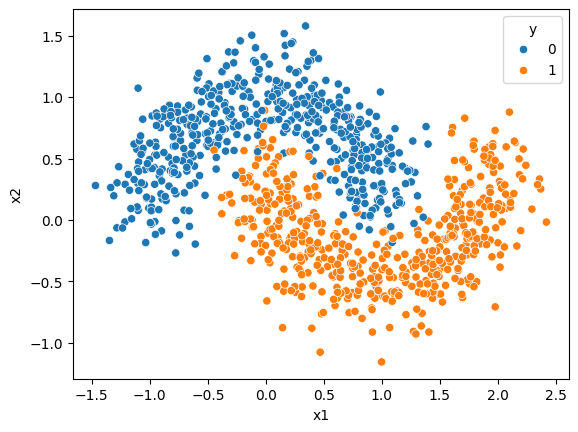

In [25]:
sns.scatterplot(x="x1",y='x2',data=dataset, hue='y')
plt.show()

In [31]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['y']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a, test_size=0.2, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [36]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100 #the output shows overfitting but it works for now.

(100.0, 93.0)

In [37]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100 #the output shows overfitting but it works for now.

(97.5, 96.0)

In [39]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train, y_train)*100, gnb.score(x_test, y_test)*100 

(86.5, 87.5)

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

In [47]:
vc = VotingClassifier(li, weights=[10,4,7])
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 4, 7])

In [49]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100 

(97.75, 94.5)

In [52]:
prd = {'dt':dt.predict(x_test),'svm':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}

In [53]:
pd.DataFrame(prd) #

,dt,svm,gnb,vc
0,0,0,0,0
1,1,1,0,1
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,0,0,1,0
197,0,0,0,0
198,1,1,1,1
